# Sounds analysis of Mars from Perseverance Rover

Source: https://mars.nasa.gov/mars2020/participate/sounds/?playlist=mars&item=first-sounds-filtered&type=mars
    

<img src="https://github.com/retkowsky/images/blob/master/mars.jpg?raw=true">

## 1. Informations

In [1]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [2]:
import datetime
today = datetime.datetime.now()
print("Today is", today)

Today is 2021-02-25 21:58:28.245992


In [3]:
#!pip install librosa
#!pip install noisereduce
#!pip install seaborn

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import librosa, librosa.display, IPython.display as ipd
import numpy as np
import noisereduce as nr
import wave
from scipy.io import wavfile as wav
import os
import os.path, time
import seaborn

## 2. Sound analysis

In [6]:
audiofile = 'Sounds-of-Mars_first-sounds-filtered.wav'

In [35]:
from os.path import getsize
sizefile=getsize(audiofile)
print(f"Size of {audiofile} file = {sizefile}")

Size of Sounds-of-Mars_first-sounds-filtered.wav file = 3545384


In [18]:
print("File last modified date: %s" % time.ctime(os.path.getmtime(audiofile)))
print("Created: %s" % time.ctime(os.path.getctime(audiofile)))

File last modified date: Thu Feb 25 21:44:19 2021
Created: Thu Feb 25 21:44:19 2021


In [19]:
samples, sampling_rate = librosa.load(audiofile, sr = None, mono = True, offset = 0.0, duration = None)
len(samples), sampling_rate

(864864, 48000)

In [20]:
duration=len(samples)/sampling_rate
print("Audio file duration =", duration, 'seconds.')

Audio file duration = 18.018 seconds.


## 3. Audio

In [21]:
from IPython.display import Audio
Audio(audiofile)

## 4. Signal

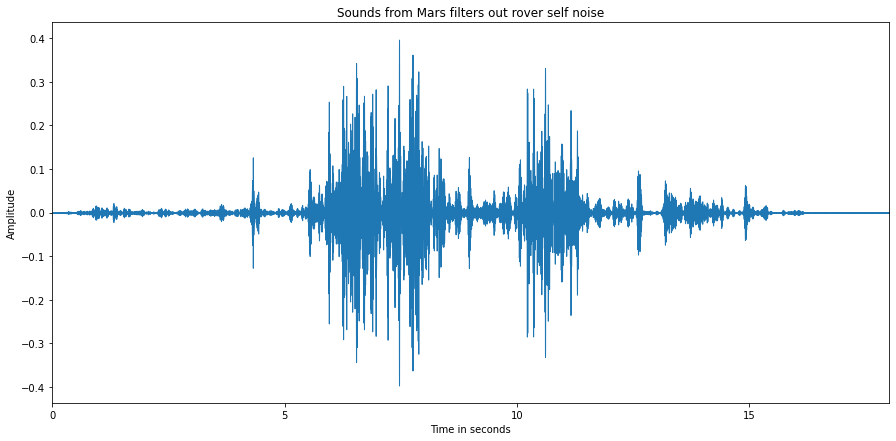

In [22]:
from librosa import display

plt.figure(figsize=(15,7))

librosa.display.waveplot(y=samples, sr=sampling_rate)
plt.title('Sounds from Mars filters out rover self noise')
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.savefig('graphs/signal.jpg')

In [23]:
y, sr = librosa.load(audiofile)

In [24]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [25]:
tempo

0

> No tempo in the sound.

In [26]:
beat_frames

array([], dtype=int64)

## 5. Spectrum using FFT

The fast Fourier transform (FFT) is an algorithm that can efficiently compute the Fourier transform:

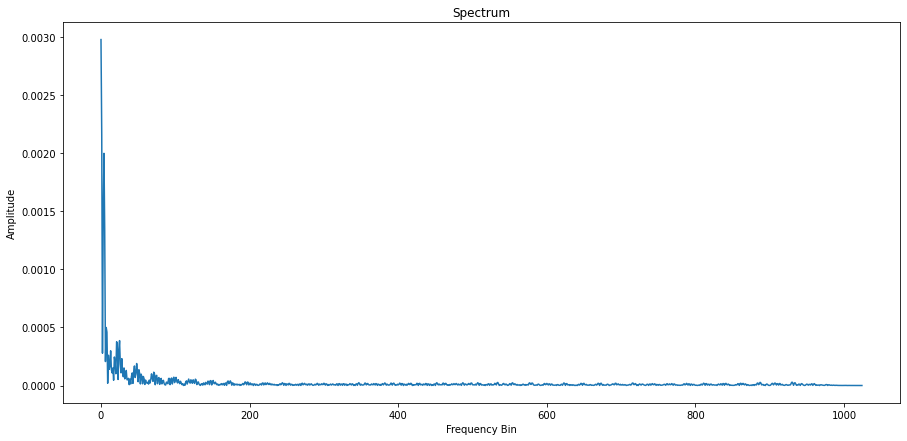

In [27]:
plt.figure(figsize=(15,7))
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');
plt.savefig('graphs/spectrum.jpg')

## 6. Spectogram

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

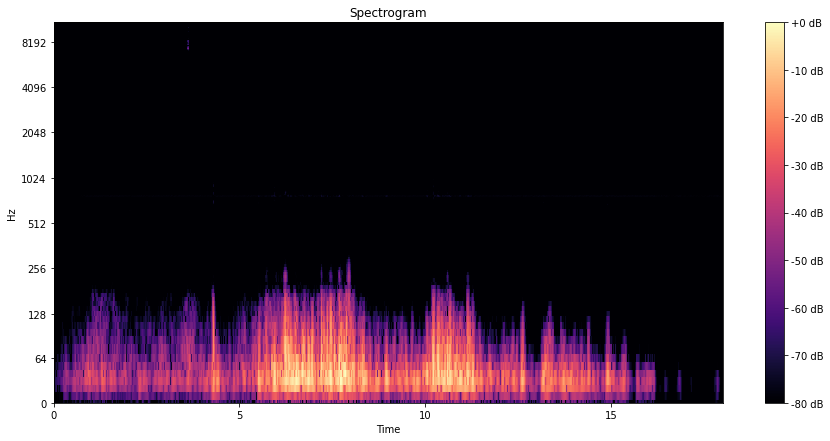

In [28]:
plt.figure(figsize=(15,7))
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');
plt.savefig('graphs/spectogram.jpg')

# 7. Creation of an Azure Machine Learning experiment

Now let's connect to an Azure ML workspace, create an experiment and let's save our results.

In [29]:
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace

In [30]:
print("You are using Azure ML", azureml.core.VERSION)

You are using Azure ML 1.20.0


In [31]:
from azureml.core import Workspace

ws = Workspace.from_config()
print('Azure ML Workspace name: ' + ws.name, 
      'Azure region: ' + ws.location, 
      'Resource group: ' + ws.resource_group, sep='\n')

Azure ML Workspace name: azuremlsound
Azure region: westeurope
Resource group: azuremlsound-rg


In [32]:
from azureml.core import experiment
experiment = Experiment(workspace=ws, name="Mars_Sound")

### Now let's log in an Azure ML experiment the graphs & some stats

In [37]:
run = experiment.start_logging()

run.log('Audio file duration', duration)
run.log('Audio sampling rate', sampling_rate)
run.log('Audio file size', sizefile )

run.log_image('Signal', 'graphs/signal.jpg')
run.log_image('Spectrum', 'graphs/spectrum.jpg')
run.log_image('Spectogram', 'graphs/spectogram.jpg')

run.complete()

In [38]:
experiment

Experiment(Name: Mars_Sound,
Workspace: azuremlsound)

### Results are now available in an Azure ML experiment:

<img src="https://github.com/retkowsky/images/blob/master/mars1.jpg?raw=true">
<img src="https://github.com/retkowsky/images/blob/master/mars2.jpg?raw=true">
<img src="https://github.com/retkowsky/images/blob/master/mars3.jpg?raw=true">